# PA001: Airbnb

# Planejamento da solução (IOT)

# Input - Entrada 
   

## O problema de negócio

 1. Mapear as previsões de escolha de destino aos usuários de uma plataforma de locação de hospedagem.

# Output - Saída

## Modelo de Previsão para escolha do primeiro destino do usuário.


   1.0. Predições serão salvas em uma tabela do banco de dados.

   2.0. API

   Input: usuários e suas características;

   Output: usuários e suas características com a predição do destino;

# Tasks - Processo

 * New York City Airbnb Open Data:
 * https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code
 * Airbnb listings and metrics in NYC, NY, USA (2019)
    

*- Compreensão do modelo de negócio do Airbnb*
   - Marketplace ( Conectar pessoas que oferecem acomodação, com pessoas que estão procurando acomodação).
 
    
*- Usuários oferecem acomodações*
   - Tamanho do portfólio.
   - Diversidade/Densidade de Portfólio.
   - Preço Médio

*- Alta demanda* (usuário que não desejam hotel).
   - Número de Usuários
   - LTV ( Lifetime Value )
   - CAC ( Client Acquisition Cost )
   - Gross Revenue = ( Fee*Número cliente ) - CAC 

# Imports

In [1]:
import pandas as pd
from sklearn import model_selection as ms
from sklearn import preprocessing  as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt

from keras import models as ml
from keras import layers as l

/home/ehgeraldo/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-08-17 13:55:29.547226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-17 13:55:29.547272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Helper Functions

## Loading Data

In [11]:
pwd

'/home/ehgeraldo/repos/airbnb'

In [15]:
# load data
df_raw = pd.read_csv('/home/ehgeraldo/repos/airbnb/data/train_users.csv')

# Data Description

In [16]:
df1 = df_raw.copy()

### Data dimensions

In [17]:
print( 'Number of rows:    {}'.format( df_raw.shape[0] ) )
print( 'Number of columns: {}'.format( df_raw.shape[1] ) )

Number of rows:    213451
Number of columns: 16


### Data types

In [19]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### Check NAs

In [20]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### Replace NAs

In [21]:
df1 = df1.dropna()
df1.shape

(68171, 16)

In [22]:
print('Removed data: {:.2f}%'.format( 1-(df1.shape[0] / df_raw.shape[0] ) ) )

Removed data: 0.68%


In [23]:
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [24]:
# date_account_created : (object -> datetime)
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active : (int64 -> datetime)
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S' )

# date_first_booking : (object -> datetime)
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# age : (float64 -> int64)
df1['age'] = df1['age'].astype( int )

In [25]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [26]:
df1.sample().T

,34424
id,56y7e26n6b
date_account_created,2012-07-31 00:00:00
timestamp_first_active,2012-07-31 07:39:36
date_first_booking,2012-11-07 00:00:00
gender,MALE
age,28
signup_method,facebook
signup_flow,0
language,en
affiliate_channel,sem-non-brand


## 1.4. Check Balanced Data

In [27]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Data Filtering

In [81]:
df2 = df1.copy()

## 2.1. Filtering Rows

## 2.2. Columns Selection

# 3.0. Data Preparation

In [102]:
df3 = df2.copy()

In [103]:
df3.shape

(68171, 16)

In [104]:
# dummy variable
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df3 = pd.concat( [df3[['id','country_destination']], df3_dummy], axis=1 )

In [105]:
df3.shape

(68171, 117)

# 4.0. Feature Selection

In [106]:
# Remove columns irelevants to training models 
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df4 = df3.drop( cols_drop, axis=1 )

In [107]:
df4.sample().T

,186248
id,enfnzd4grp
country_destination,US
age,38
signup_flow,25
gender_-unknown-,0
...,...
first_browser_Sogou Explorer,0
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0


# 5.0. Machine Learning Model  - Neural Network MLP

In [108]:
# Select data to train and test or "train, validation, test"

# On X_train drop to 'country_destination' response variable 
x = df4.drop( 'country_destination', axis=1 )

# On y_train include 'country_destination'
y = df4['country_destination'].copy()

In [109]:
x.head(3)

,id,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,4ft3gnwmtx,56,3,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,42,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,41,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
y.head(3)

2       US
3    other
4       US
Name: country_destination, dtype: object

In [111]:
# Split dataset into training and test
#80% train and 20% test

X_train, X_test, y_train, y_test = ms.train_test_split( x, y, test_size=0.2, random_state=32 )

In [113]:
X_train.head()

,id,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
22531,b9eperouva,22,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
139247,6eqkvzq32e,63,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
170612,8wtjbmxmb3,35,25,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,floutkfa37,28,3,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
73845,4au7h23zsl,30,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Drop id to dataset

x_train = X_train.drop('id',axis=1)
x_test = X_test.drop('id', axis=1)

In [115]:
X_train.shape

(54536, 113)

In [116]:
X_test.shape

(13635, 113)

In [117]:
# One hot encoding (categoric variables -> numeric variables)

ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [118]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [119]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim= x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax') )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.3047 - accuracy: 0.7073
Epoch 2/100
1705/1705 [==============================] - 9s 5ms/step - loss: 1.2648 - accuracy: 0.7079
Epoch 3/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.2319 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 9s 5ms/step - loss: 1.1959 - accuracy: 0.7087
Epoch 5/100
1705/1705 [==============================] - 9s 5ms/step - loss: 1.1818 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 9s 5ms/step - loss: 1.1738 - accuracy: 0.7085
Epoch 7/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1605 - accuracy: 0.7086
Epoch 8/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.1519 - accuracy: 0.7086
Epoch 9/100
1705/1705 [==============================] - 5s 3ms/step - loss: 1.1447 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================] - 5s 3ms/step - l

1705/1705 [==============================] - 6s 4ms/step - loss: 1.1012 - accuracy: 0.7113
Epoch 80/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.1010 - accuracy: 0.7113
Epoch 81/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.1007 - accuracy: 0.7113
Epoch 82/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1006 - accuracy: 0.7115
Epoch 83/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.0998 - accuracy: 0.7111
Epoch 84/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.1000 - accuracy: 0.7118
Epoch 85/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.0998 - accuracy: 0.7114
Epoch 86/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.0992 - accuracy: 0.7117
Epoch 87/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.0989 - accuracy: 0.7115
Epoch 88/100
1705/1705 [==============================] - 6s 4ms/step - loss:

## 5.1. NN Performance

In [121]:
y_train

22531        US
139247       FR
170612       IT
2995         US
73845        US
          ...  
165842       US
71991     other
59064        US
187388       IT
30096        US
Name: country_destination, Length: 54536, dtype: object

In [120]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn   = yhat_nn.reshape( 1, -1 )[0]

427/427 [==============================] - 2s 3ms/step


In [123]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [124]:
y_test_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

Accuracy: 0.7033370003667033


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

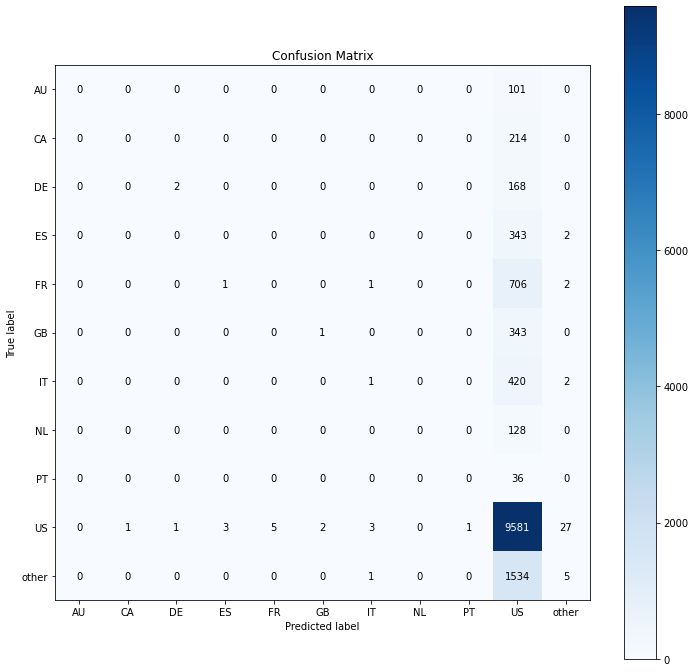

In [125]:
# Accuracy (right/correct predict)
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print( 'Accuracy: {}'.format( acc_nn ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12))


# Balanced Accuray
# F-Score Balanced
# Recall-Precison
# ROC 
# Kappa Metrics
# Matthew Metrics